# Scratch
This notebook is just for running some quick and dirty tests.

In [1]:
import numpy as np
from scipy.integrate import odeint
from sklearn.model_selection import KFold, GridSearchCV

from context import sindy
from sindy import SINDy
from sindy.differentiation import FiniteDifference, SmoothedFiniteDifference
from sindy.optimizers import STLSQ, SR3

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
lorenz = lambda z,t : [10*(z[1] - z[0]), z[0]*(28 - z[2]) - z[1], z[0]*z[1] - 8/3*z[2]]

In [3]:
n_points = 1000

x0 = [8,27,-7]
t = np.linspace(0, 10, n_points)
x = odeint(lorenz, x0, t)

train_idx = int(n_points * 0.75)
x_train, x_test = x[:train_idx], x[train_idx:]
t_train, t_test = t[:train_idx], t[train_idx:]

centered_difference = FiniteDifference(order=2, drop_endpoints=False)

In [8]:
def plot_predictions(model, title='Model predictions'):
    fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(10, 10))
    for i in range(x_test.shape[1]):
        axs[i].plot(t_test, centered_difference(x_test, t_test)[:,i], '--', label='Numeric derivative')
        axs[i].plot(t_test, model.predict(x_test)[:,i], label='Model prediction')
        axs[i].legend()
        axs[i].set(ylabel='$x_{}$'.format(i))

    axs[0].set(title=title)
    fig.show()

In [7]:
# Original SR3 implementation (hard thresholding; l0)
model = SINDy(optimizer=SR3())
model.fit(x_train, t_train)

print(model.equations())

['-0.279  + -10.112  + 10.080 x0', '1.419  + 27.555  + -0.851 x0 + -0.139 x1 + -0.987 1 x1', '-0.245  + 0.250 x0 + -2.593 x1 + 0.985 1 x0']


['-0.279  + -10.112  + 10.080 x0', '1.419  + 27.555  + -0.851 x0 + -0.139 x1 + -0.987 1 x1', '-0.245  + 0.250 x0 + -2.593 x1 + 0.985 1 x0']


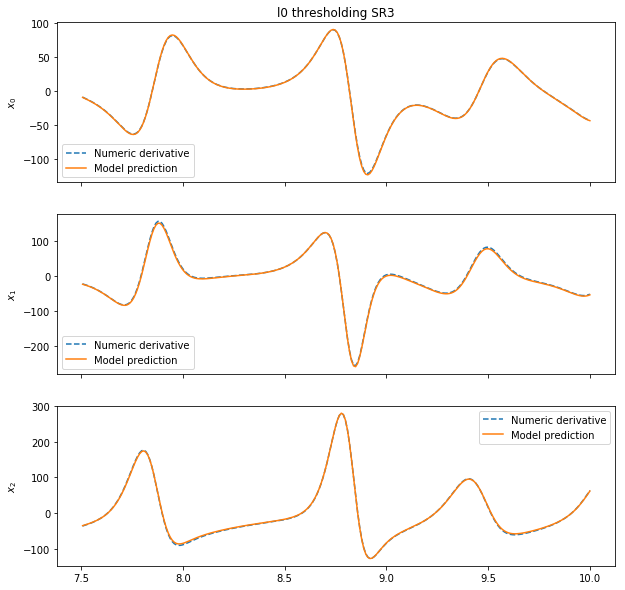

In [19]:
# New (prox) SR3 implementation (hard thresholding; l0)
model = SINDy(optimizer=SR3())
model.fit(x_train, t_train)

print(model.equations())
plot_predictions(model, title='l0 thresholding SR3')

['-0.172  + -10.011  + 9.979 x0', '1.312  + 27.454  + -0.750 x0 + -0.039 x1 + -0.887 1 x1', '-0.145  + 0.150 x0 + -2.493 x1 + 0.885 1 x0']


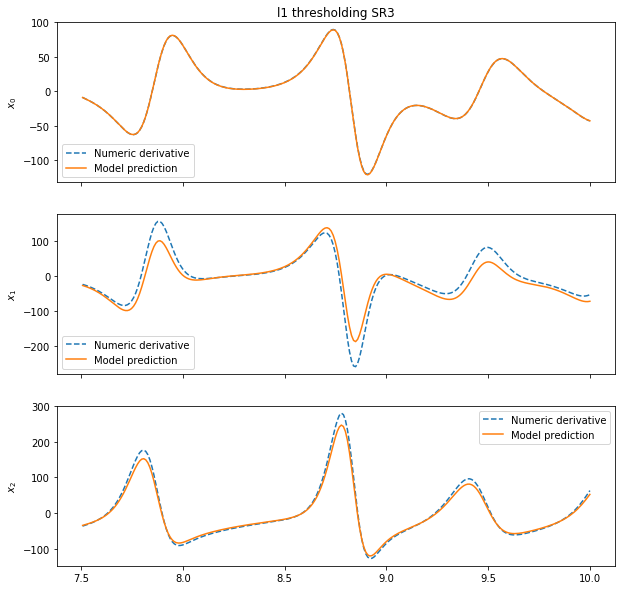

In [10]:
# New (prox) SR3 implementation (soft thresholding; l1)
model = SINDy(optimizer=SR3(thresholder='l1'))
model.fit(x_train, t_train)

print(model.equations())
plot_predictions(model, title='l1 thresholding SR3')

['-0.173  + -10.111  + 10.080 x0', '1.419  + 27.555  + -0.851 x0 + -0.039 x1 + -0.987 1 x1', '-0.145  + 0.150 x0 + -2.593 x1 + 0.985 1 x0']


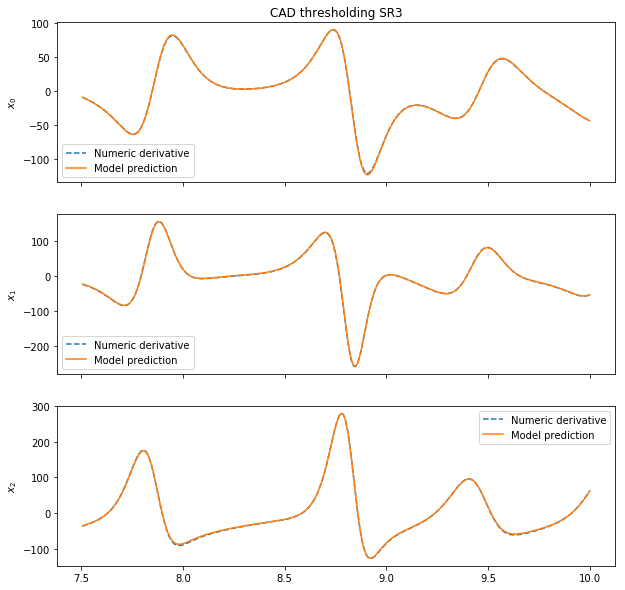

In [18]:
# New (prox) SR3 implementation (cad regularization)
model = SINDy(optimizer=SR3(thresholder='cad'))
model.fit(x_train, t_train)

print(model.equations())
plot_predictions(model, title='CAD thresholding SR3')